

**Deep Learning Assignment**
***Subhadip Deb***
**4NI20IS111**
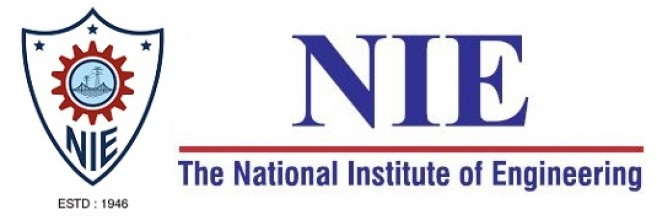


In [15]:
#Calling required modules and libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score


In [16]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target


In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Create individual models
logistic_model = LogisticRegression()
decision_tree_model = RandomForestClassifier(n_estimators=100)
svm_model = SVC(probability=True)
ada_boost_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
gradient_boost_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

In [19]:
# Create a voting classifier
voting_model = VotingClassifier(estimators=[
    ('lr', logistic_model),
    ('dt', decision_tree_model),
    ('svm', svm_model),
    ('ada', ada_boost_model),
    ('gb', gradient_boost_model)
], voting='soft')

In [20]:
# Train the voting classifier
voting_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', RandomForestClassifier()),
                             ('svm', SVC(probability=True)),
                             ('ada', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [21]:

# Make predictions using the voting classifier
voting_predictions = voting_model.predict(X_test)
print("Voting Classifier Accuracy of model created by Deb is : ", accuracy_score(y_test, voting_predictions))

Voting Classifier Accuracy of model created by Deb is :  1.0


In [22]:
# Create a stacking classifier
stacking_models = [logistic_model, decision_tree_model, svm_model, ada_boost_model, gradient_boost_model]
meta_model = LogisticRegression()
stacking_model = StackingClassifier(classifiers=stacking_models, meta_classifier=meta_model)


In [23]:

# Train the stacking classifier
stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(classifiers=[LogisticRegression(), RandomForestClassifier(),
                                SVC(probability=True), AdaBoostClassifier(),
                                GradientBoostingClassifier()],
                   meta_classifier=LogisticRegression())

In [24]:
# Make predictions using the stacking classifier
stacking_predictions = stacking_model.predict(X_test)
print("Stacking Classifier Accuracy of model created by Deb is : ", accuracy_score(y_test, stacking_predictions))


Stacking Classifier Accuracy of model created by Deb is :  1.0
